# Compare and annotation between methods

In [1]:
# Seurat 
library(Seurat)

# Statistics
library(caret)

# Data 
library(dplyr)

# Plotting
library(ggplot2)
library(RColorBrewer)
library(patchwork)

Attaching SeuratObject

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Set working directory to project root
setwd("/research/peer/fdeckert/FD20200109SPLENO")

In [3]:
# Source files
source("plotting_global.R")

# Parameter settings

In [4]:
so_file <- "data/object/seurat.rds"

# Plotting Theme
ggplot2::theme_set(theme_global_set()) 

# Load objects

In [5]:
so <- readRDS(so_file)

In [6]:
# Meta data 
scvibatch_meta <- read.csv("data/object/components/meta_data/scvibatch_meta.csv", sep = ",", row.names = 1, header = TRUE)

In [7]:
so$seurat_clusters <- scvibatch_meta$`scvi_snn_res.0.8`

# Compare clustering 

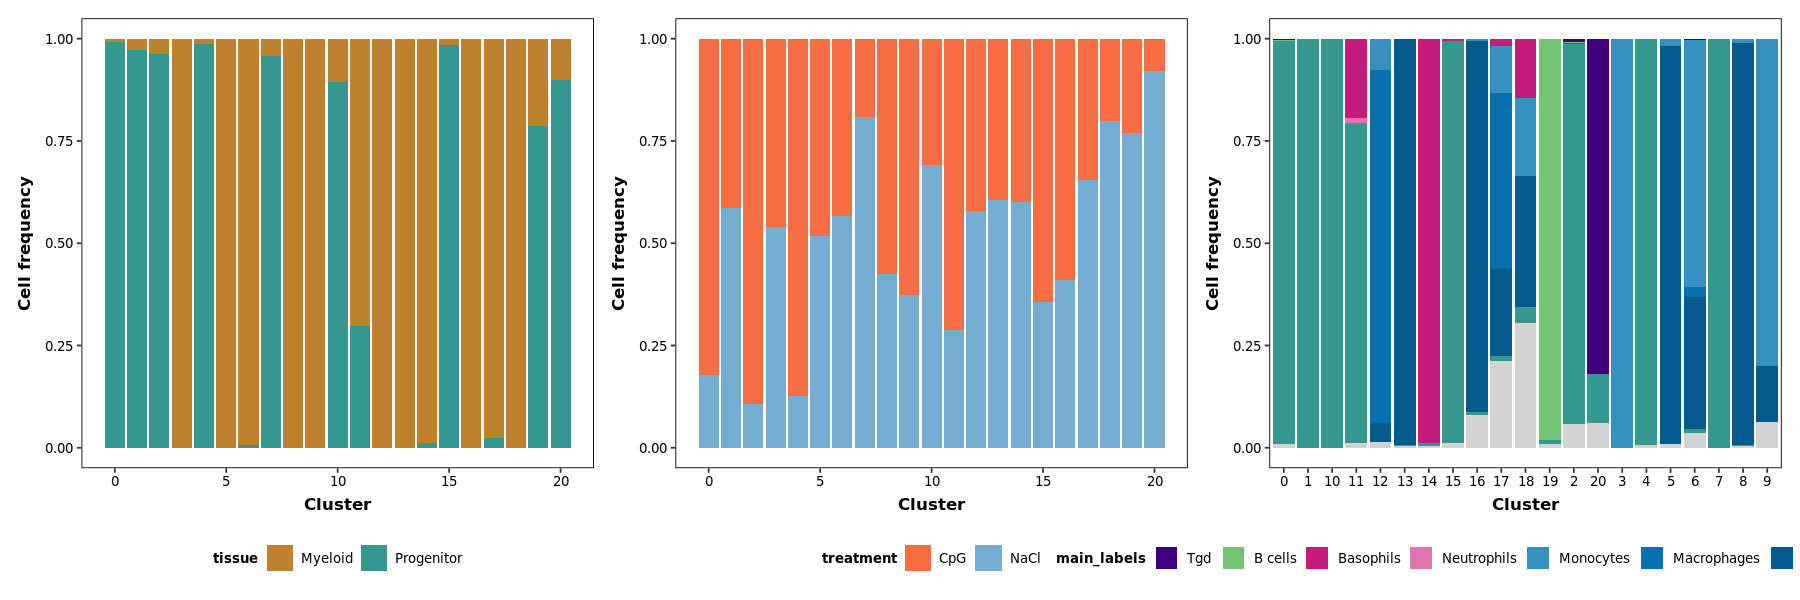

In [8]:
cluster_tissue <- ggplot(scvibatch_meta, aes(x = seurat_clusters, fill = tissue)) + 
  geom_bar(stat = "count", position = "fill") + 
  scale_fill_manual(values = so_color$tissue) +
  ggtitle("Cluster frequency") + xlab("Cluster") + ylab("Cell frequency") + 
  theme(legend.position = "bottom")

cluster_treatment <- ggplot(scvibatch_meta, aes(x = seurat_clusters, fill = treatment)) + 
  geom_bar(stat = "count", position = "fill") + 
  scale_fill_manual(values = so_color$treatment) +
  ggtitle("Cluster frequency") + xlab("Cluster") + ylab("Cell frequency") + 
  theme(legend.position = "bottom")

scvibatch_meta$seurat_clusters <- as.character(scvibatch_meta$seurat_clusters)
scvibatch_meta$main_labels <- factor(scvibatch_meta$main_labels, levels = names(so_color$main_labels))
cluster_main_labels <- ggplot(scvibatch_meta, aes(x = seurat_clusters, fill = main_labels)) + 
  geom_bar(stat = "count", position = "fill") + 
  scale_fill_manual(values = so_color$main_labels, na.value = "light gray") +
  ggtitle("Cluster frequency") + xlab("Cluster") + ylab("Cell frequency") + 
  theme(legend.position = "bottom") & 
  guides(fill = guide_legend(nrow = 1, override.aes = list(size = 3)))

options(repr.plot.width = 15, repr.plot.height = 5)
cluster_tissue + cluster_treatment + cluster_main_labels + plot_layout(ncol = 3)
ggsave(cluster_tissue, filename = "result/plot/seurat/cluster_tissue_scvibatch.png", width = 6, height = 3)
ggsave(cluster_treatment, filename = "result/plot/seurat/cluster_treatment_scvibatch.png", width = 6, height = 3)
ggsave(cluster_main_labels, filename = "result/plot/seurat/cluster_main_labels_scvibatch.png", width = 6, height = 3)

# Import scanvi object

In [9]:
library(reticulate)
sc <- import("scipy", convert = FALSE)

# Normalized data matrix 
scanvi_prog_cpg_data <- sc$sparse$load_npz("data/object/components/slots/scanvi_prog_cpg_data.npz") %>%  py_to_r() %>% as.matrix() %>% t()
colnames(scanvi_prog_cpg_data) <- read.csv("data/object/components/slots/scanvi_prog_cpg_data_cellid.txt")[, 1]
rownames(scanvi_prog_cpg_data) <- read.csv("data/object/components/slots/scanvi_prog_cpg_data_genes.txt")[, 1]

library(reticulate)
np <- import("numpy", convert = FALSE)

# Latent space representation
scanvi_prog_cpg_latend <- np$loadtxt("data/object/components/reductions/scanvi_prog_cpg_latent.txt") %>% py_to_r()
rownames(scanvi_prog_cpg_latend) <- read.csv("data/object/components/reductions/scanvi_prog_cpg_latent_cellid.txt")[, 1]

scanvi_prog_cpg_meta <- read.csv("data/object/components/meta_data/scanvi_prog_cpg_meta.csv", row.names = 1)

# Create Seurat object 
scanvi_prog_cpg_scvi <- CreateSeuratObject(counts = GetAssayData(object = so[, colnames(so) %in% colnames(scanvi_prog_cpg_data)]), assay = "SCANVI")
scanvi_prog_cpg_scvi <- AddMetaData(scanvi_prog_cpg_scvi, scanvi_prog_cpg_meta)
scanvi_prog_cpg_scvi@assays$SCANVI@data <- as(scanvi_prog_cpg_data, "dgCMatrix")
scanvi_prog_cpg_scvi[["scanvi_latent"]] <- CreateDimReducObject(embeddings = as.matrix(scanvi_prog_cpg_latend), key = "scanvi_latent_", assay = "SCANVI")

scanvi_prog_cpg_scvi$C_scANVI <- factor(scanvi_prog_cpg_scvi$C_scANVI, levels = names(so_color$fine_labels))
scanvi_prog_cpg_scvi$fine_labels_p <- factor(scanvi_prog_cpg_scvi$fine_labels_p, levels = names(so_color$fine_labels))

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from rna_umap_ to rnaumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from scanvi_latent_ to scanvilatent_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to scanvilatent_”
Warning message:
“No columnames present in cell embeddings, setting to 'scanvilatent_1:30'”


In [10]:
library(reticulate)
sc <- import("scipy", convert = FALSE)

# Normalized data matrix 
scanvi_prog_nacl_data <- sc$sparse$load_npz("data/object/components/slots/scanvi_prog_nacl_data.npz") %>%  py_to_r() %>% as.matrix() %>% t()
colnames(scanvi_prog_nacl_data) <- read.csv("data/object/components/slots/scanvi_prog_nacl_data_cellid.txt")[, 1]
rownames(scanvi_prog_nacl_data) <- read.csv("data/object/components/slots/scanvi_prog_nacl_data_genes.txt")[, 1]

library(reticulate)
np <- import("numpy", convert = FALSE)

# Latent space representation
scanvi_prog_nacl_latend <- np$loadtxt("data/object/components/reductions/scanvi_prog_nacl_latent.txt") %>% py_to_r()
rownames(scanvi_prog_nacl_latend) <- read.csv("data/object/components/reductions/scanvi_prog_nacl_latent_cellid.txt")[, 1]

scanvi_prog_nacl_meta <- read.csv("data/object/components/meta_data/scanvi_prog_nacl_meta.csv", row.names = 1)

# Create Seurat object 
scanvi_prog_nacl_scvi <- CreateSeuratObject(counts = GetAssayData(object = so[, colnames(so) %in% colnames(scanvi_prog_nacl_data)]), assay = "SCANVI")
scanvi_prog_nacl_scvi <- AddMetaData(scanvi_prog_nacl_scvi, scanvi_prog_nacl_meta)
scanvi_prog_nacl_scvi@assays$SCANVI@data <- as(scanvi_prog_nacl_data, "dgCMatrix")
scanvi_prog_nacl_scvi[["scanvi_latent"]] <- CreateDimReducObject(embeddings = as.matrix(scanvi_prog_nacl_latend), key = "scanvi_latent_", assay = "SCANVI")

scanvi_prog_nacl_scvi$C_scANVI <- factor(scanvi_prog_nacl_scvi$C_scANVI, levels = names(so_color$fine_labels))
scanvi_prog_nacl_scvi$fine_labels_p <- factor(scanvi_prog_nacl_scvi$fine_labels_p, levels = names(so_color$fine_labels))

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from rna_umap_ to rnaumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from scanvi_latent_ to scanvilatent_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to scanvilatent_”
Warning message:
“No columnames present in cell embeddings, setting to 'scanvilatent_1:30'”


# Dim reduction and clustering 

In [11]:
source("bin/seurat_function.R")

prefix <- tolower("SCANVI")
name_nn   <- paste0(prefix, "_nn")
name_snn  <- paste0(prefix, "_snn")
name_umap <- paste0(prefix, "_umap")
name_nno  <- paste0(prefix, "_nno")
cluster_res  = 0.8

Computing nearest neighbors

Only one graph name supplied, storing nearest-neighbor graph only

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8158
Number of edges: 252063

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7942
Number of communities: 12
Elapsed time: 1 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:49:22 UMAP embedding parameters a = 0.9922 b = 1.112

13:49:23 Commencing smooth kNN distance calibration using 1 thread

13:49:23 Initializing from normalized Laplacian + noise

13:49:24 Commencing optimization for 500 epochs, with 214664 positive edges

13:49:47 Optimization finished



An object of class Seurat 
15864 features across 8158 samples within 1 assay 
Active assay: SCANVI (15864 features, 0 variable features)
 2 dimensional reductions calculated: scanvi_latent, scanvi_umap_nno

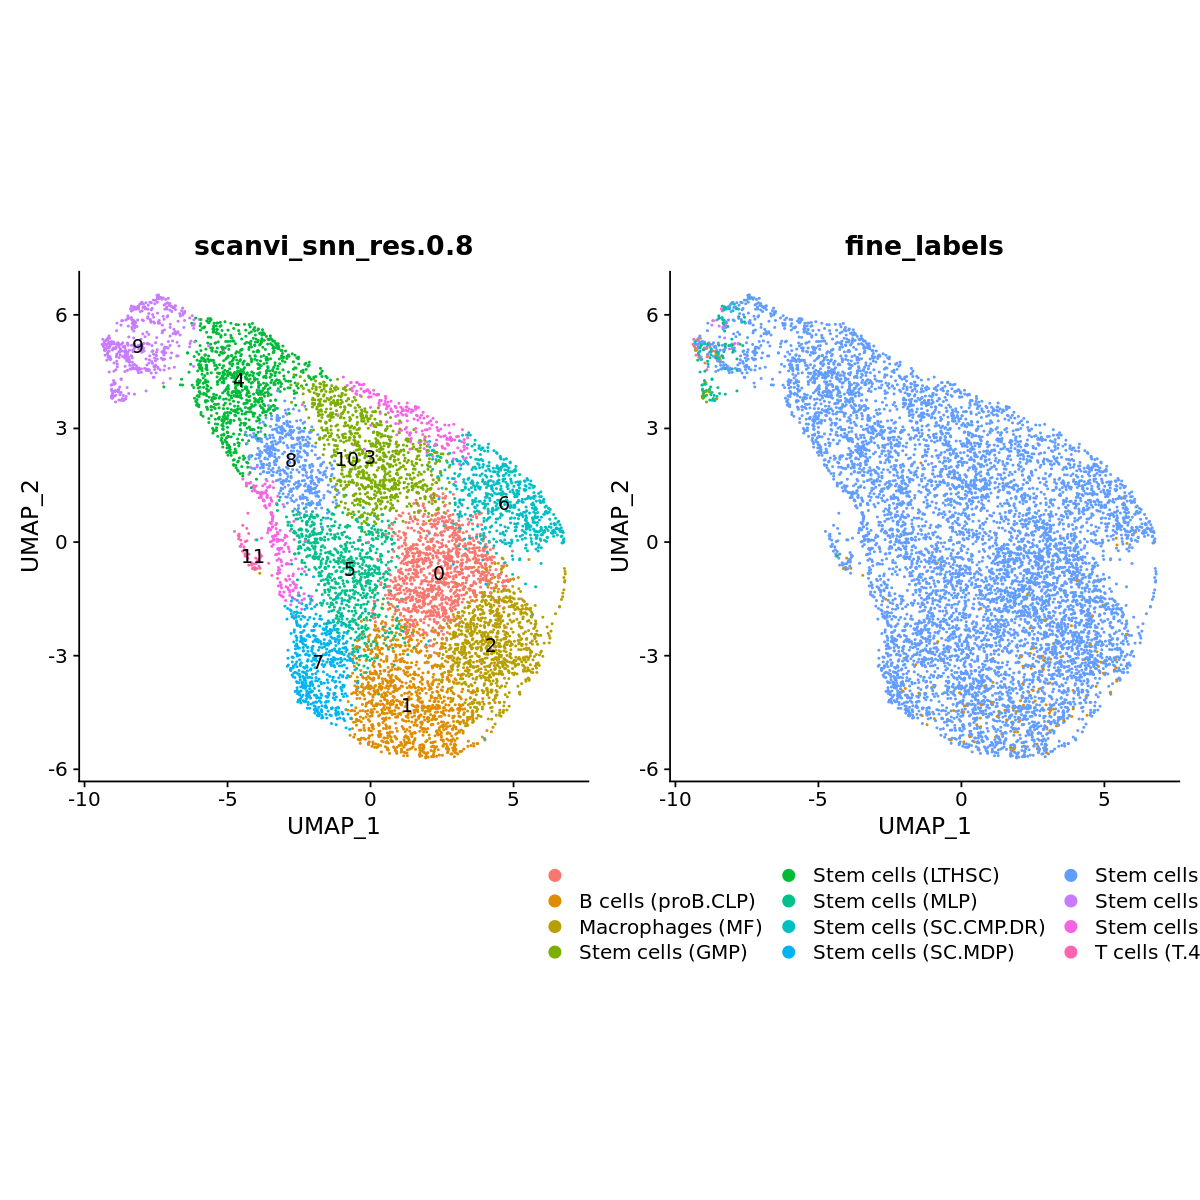

In [13]:
scanvi_prog_cpg_scvi <- FindNeighbors(
        object          = scanvi_prog_cpg_scvi,
        assay           = "SCANVI",
        dims            = 1:30,
        k.param         = 20,
        reduction       = "scanvi_latent",
        return.neighbor = TRUE,
        graph.name      = name_nno
    )

scanvi_prog_cpg_scvi <- FindNeighbors(
        object          = scanvi_prog_cpg_scvi,
        assay           = "SCANVI",
        dims            = 1:30,
        k.param         = 20,
        reduction       = "scanvi_latent",
        graph.name      = c(name_nn, name_snn)
    )

scanvi_prog_cpg_scvi <- FindClusters(
    object         = scanvi_prog_cpg_scvi,
    resolution     = cluster_res,
    graph.name     = name_snn
)

scanvi_prog_cpg_scvi <- RunUMAP(
        object         = scanvi_prog_cpg_scvi,
        assay          = "SCANVI",
        n.neighbors    = 20,
        nn.name        = name_nno,
        reduction.name = paste0(name_umap, "_nno")
)

reduction <- "scanvi_umap_nno"
dplot_1 <- DimPlot(scanvi_prog_cpg_scvi, reduction = reduction, group.by = "scanvi_snn_res.0.8", label = TRUE) & 
    theme(aspect.ratio = 1, legend.position = "none")
dplot_2 <- DimPlot(scanvi_prog_cpg_scvi, reduction = reduction, group.by = "fine_labels", label = FALSE) & 
    theme(aspect.ratio = 1, legend.position = "bottom") & 
    guides(color = guide_legend(ncol = 3, override.aes = list(size = 3)))
scanvi_prog_cpg_scvi
options(repr.plot.width = 10, repr.plot.height = 10)
dplot <- dplot_1 + dplot_2 + plot_layout(ncol = 2)
dplot
ggsave(dplot, filename = "result/plot/seurat/dimplot_scanvi_cpg_1.png", width = 9, height = 9)

Computing nearest neighbors

Only one graph name supplied, storing nearest-neighbor graph only

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4602
Number of edges: 142663

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8087
Number of communities: 15
Elapsed time: 0 seconds


13:49:53 UMAP embedding parameters a = 0.9922 b = 1.112

13:49:53 Commencing smooth kNN distance calibration using 1 thread

13:49:54 Initializing from normalized Laplacian + noise

13:49:54 Commencing optimization for 500 epochs, with 119230 positive edges

13:50:07 Optimization finished



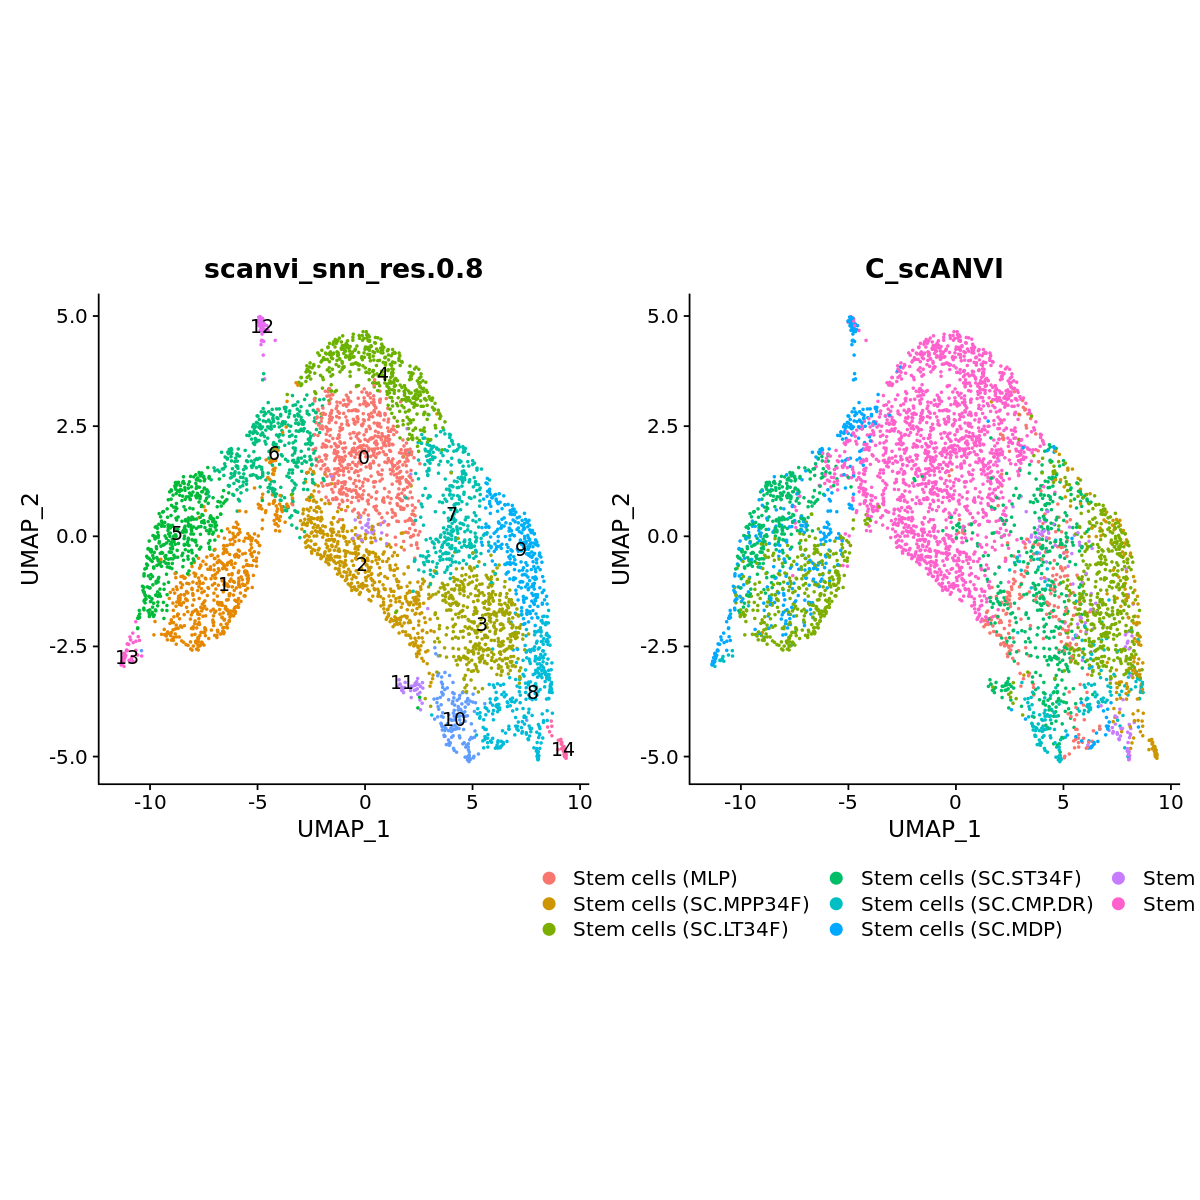

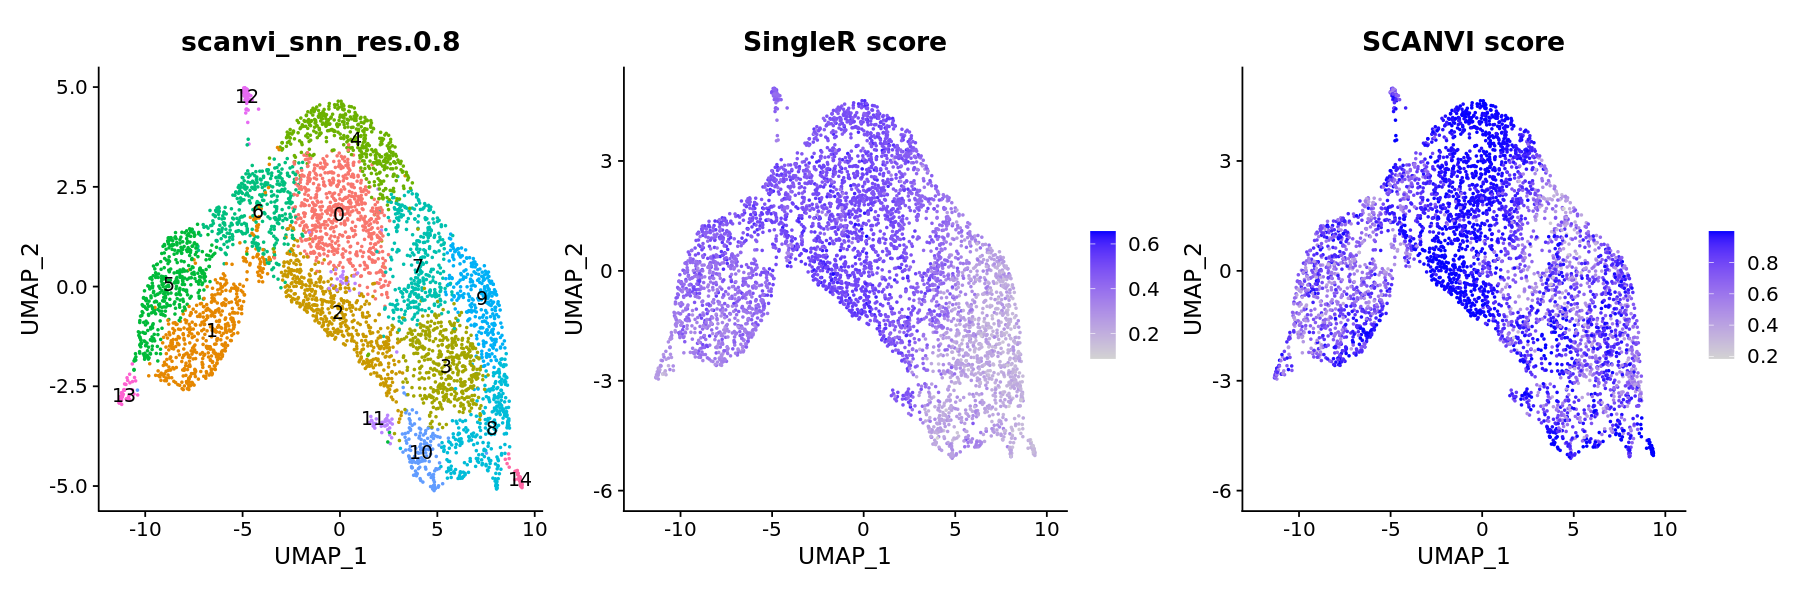

In [14]:
scanvi_prog_nacl_scvi <- FindNeighbors(
        object          = scanvi_prog_nacl_scvi,
        assay           = "SCANVI",
        dims            = 1:30,
        k.param         = 20,
        reduction       = "scanvi_latent",
        return.neighbor = TRUE,
        graph.name      = name_nno
    )

scanvi_prog_nacl_scvi <- FindNeighbors(
        object          = scanvi_prog_nacl_scvi,
        assay           = "SCANVI",
        dims            = 1:30,
        k.param         = 20,
        reduction       = "scanvi_latent",
        graph.name      = c(name_nn, name_snn)
    )

scanvi_prog_nacl_scvi <- FindClusters(
    object         = scanvi_prog_nacl_scvi,
    resolution     = cluster_res,
    graph.name     = name_snn
)

scanvi_prog_nacl_scvi <- RunUMAP(
        object         = scanvi_prog_nacl_scvi,
        assay          = "SCANVI",
        n.neighbors    = 20,
        nn.name        = name_nno,
        reduction.name = paste0(name_umap, "_nno")
)

reduction <- "scanvi_umap_nno"
dplot_1 <- DimPlot(scanvi_prog_nacl_scvi, reduction = reduction, group.by = "scanvi_snn_res.0.8", label = TRUE) & 
    theme(aspect.ratio = 1, legend.position = "none")
dplot_2 <- DimPlot(scanvi_prog_nacl_scvi, reduction = reduction, group.by = "C_scANVI", label = FALSE) & 
    theme(aspect.ratio = 1, legend.position = "bottom") & 
    guides(color = guide_legend(ncol = 3, override.aes = list(size = 3)))

options(repr.plot.width = 10, repr.plot.height = 10)
dplot <- dplot_1 + dplot_2 + plot_layout(ncol = 2)
dplot
ggsave(dplot, filename = "result/plot/seurat/dimplot_scanvi_nacl_1.png", width = 9, height = 9)

fplot_1 <- FeaturePlot(scanvi_prog_nacl_scvi, reduction = reduction, features = "fine_delta_score_p") & theme(aspect.ratio = 1) & ggtitle("SingleR score")
fplot_2 <- FeaturePlot(scanvi_prog_nacl_scvi, reduction = reduction, features = "p_score_scANVI") & theme(aspect.ratio = 1) & ggtitle("SCANVI score")

fplot <- dplot_1 + fplot_1 + fplot_2 + plot_layout(ncol = 3)
options(repr.plot.width = 15, repr.plot.height = 5)
fplot
# ggsave(fplot_tcr_cd3, filename = "result/plot/seurat/fplot_tcr_cd3.png", width = 6, height = 3)

# Save UMAP

In [ ]:
write.csv(scanvi_prog_nacl_scvi@reductions$scanvi_umap_nno[[]], "data/object/components/reductions/scanvi_prog_nacl_umap_nno.csv")
write.csv(scanvi_prog_cpg_scvi@reductions$scanvi_umap_nno[[]], "data/object/components/reductions/scanvi_prog_cpg_umap_nno.csv")

scanvi_prog_nacl_scvi

# Save cluster

In [ ]:
write.csv(scanvi_prog_nacl_scvi@meta.data[, "scanvi_snn_res.0.8", drop=FALSE], "data/object/components/cluster/scanvi_prog_nacl_snn_res.0.8.csv")
write.csv(scanvi_prog_cpg_scvi@meta.data[, "scanvi_snn_res.0.8", drop=FALSE], "data/object/components/cluster/scanvi_prog_cpg_snn_res.0.8.csv")

# Set reduction for plotting

In [ ]:
reduction <- "scanvi_umap_nno"

# Fine label dim plot 

In [ ]:
dplot_1 <- DimPlot(scanvi_prog_nacl_scvi, reduction = reduction, group.by = "fine_labels_p", label = FALSE) & 
    theme(aspect.ratio = 1, legend.position = "bottom") & 
    scale_color_manual(values = so_color$fine_labels, na.value = "dark gray")

dplot_2 <- DimPlot(scanvi_prog_cpg_scvi, reduction = reduction, group.by = "fine_labels_p", label = FALSE) & 
    theme(aspect.ratio = 1, legend.position = "bottom") & 
    scale_color_manual(values = so_color$fine_labels, na.value = "dark gray")

options(repr.plot.width = 15, repr.plot.height = 5)
dplot <- dplot_1 + dplot_2 + plot_layout(ncol = 2, guides = "collect") & guides(color = guide_legend(nrow = 4, override.aes = list(size = 3)))
dplot
ggsave(dplot, filename = "result/plot/seurat/scanvi_progenitor_label_singler_all_dim.png", width = 10, height = 5)

In [ ]:
dplot_1 <- DimPlot(scanvi_prog_nacl_scvi, reduction = reduction, group.by = "C_scANVI", label = FALSE) & 
    theme(aspect.ratio = 1, legend.position = "bottom") & 
    scale_color_manual(values = so_color$fine_labels, na.value = "dark gray")

dplot_2 <- DimPlot(scanvi_prog_cpg_scvi, reduction = reduction, group.by = "C_scANVI", label = FALSE) & 
    theme(aspect.ratio = 1, legend.position = "bottom") & 
    scale_color_manual(values = so_color$fine_labels, na.value = "dark gray")

options(repr.plot.width = 15, repr.plot.height = 5)
dplot <- dplot_1 + dplot_2 + plot_layout(ncol = 2, guides = "collect") & guides(color = guide_legend(nrow = 4,override.aes = list(size = 3)))
dplot
ggsave(dplot, filename = "result/plot/seurat/scanvi_progenitor_label_all_dim.png", width = 10, height = 5)

# Fine label scroe feature plot

In [ ]:
fplot_1 <- FeaturePlot(scanvi_prog_nacl_scvi, reduction = reduction, features = "fine_delta_score_p") & 
    theme(aspect.ratio = 1, legend.position = "bottom") & ggtitle("SingleR score")
fplot_2 <- FeaturePlot(scanvi_prog_cpg_scvi, reduction = reduction, features = "fine_delta_score_p") & 
    theme(aspect.ratio = 1, legend.position = "bottom") & ggtitle("SingleR score")

fplot <- fplot_1 + fplot_2 + plot_layout(ncol = 3)
options(repr.plot.width = 10, repr.plot.height = 5)
fplot
ggsave(fplot, filename = "result/plot/seurat/scanvi_progenitor_singler_score_feature_plot.png", width = 10, height = 5)

In [ ]:
fplot_1 <- FeaturePlot(scanvi_prog_nacl_scvi, reduction = reduction, features = "p_score_scANVI") & theme(aspect.ratio = 1) & ggtitle("SCANVI score")
fplot_2 <- FeaturePlot(scanvi_prog_cpg_scvi, reduction = reduction, features = "p_score_scANVI") & theme(aspect.ratio = 1) & ggtitle("SCANVI score")

fplot <- fplot_1 + fplot_2 + plot_layout(ncol = 3)
options(repr.plot.width = 10, repr.plot.height = 5)
fplot
ggsave(fplot, filename = "result/plot/seurat/scanvi_progenitor_scanvi_score_feature_plot.png", width = 10, height = 5)

# Marker feature 

In [ ]:
fplot_1 <- FeaturePlot(scanvi_prog_nacl_scvi, reduction = reduction, features = "Gata2") & theme(aspect.ratio = 1) & ggtitle("SingleR score")
fplot_2 <- FeaturePlot(scanvi_prog_cpg_scvi, reduction = reduction, features = "Gata2") & theme(aspect.ratio = 1) & ggtitle("SCANVI score")

fplot <- fplot_1 + fplot_2 + plot_layout(ncol = 3)
options(repr.plot.width = 10, repr.plot.height = 5)
fplot
ggsave(fplot, filename = "result/plot/seurat/scanvi_progenitor_gata2_feature_plot.png", width = 10, height = 5)

In [ ]:
fplot_1 <- FeaturePlot(scanvi_prog_nacl_scvi, reduction = reduction, features = "Gata1") & theme(aspect.ratio = 1) & ggtitle("SingleR score")
fplot_2 <- FeaturePlot(scanvi_prog_cpg_scvi, reduction = reduction, features = "Gata1") & theme(aspect.ratio = 1) & ggtitle("SCANVI score")

fplot <- fplot_1 + fplot_2 + plot_layout(ncol = 3)
options(repr.plot.width = 10, repr.plot.height = 5)
fplot
ggsave(fplot, filename = "result/plot/seurat/scanvi_progenitor_gata2_feature_plot.png", width = 10, height = 5)

# Fine label bar plot

In [ ]:
fine_label_all_freq <- ggplot(rbind(scanvi_prog_nacl_scvi@meta.data, scanvi_prog_cpg_scvi@meta.data), aes(x = fine_labels, fill = treatment)) + 
  geom_bar(stat = "count", position = "dodge") + 
  scale_fill_manual(values = so_color$treatment) +
  ggtitle("Label frequency") + xlab("Fine label") + ylab("Label frequency") + 
  theme(
      legend.position = "bottom", 
      axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
options(repr.plot.width = 10, repr.plot.height = 4)
fine_label_all_freq
ggsave(fine_label_all_freq, filename = "result/plot/seurat/scanvi_progenitor_finelabel_all_bar.png", width = 10, height = 4)

fine_label_p_freq <- ggplot(rbind(scanvi_prog_nacl_scvi@meta.data, scanvi_prog_cpg_scvi@meta.data), aes(x = fine_labels_p, fill = treatment)) + 
  geom_bar(stat = "count", position = "dodge") + 
  scale_fill_manual(values = so_color$treatment) +
  ggtitle("Label frequency") + xlab("Fine label") + ylab("Label frequency") + 
  theme(
      legend.position = "bottom", 
      axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
options(repr.plot.width = 10, repr.plot.height = 4)
fine_label_p_freq
ggsave(fine_label_p_freq, filename = "result/plot/seurat/scanvi_progenitor_finelabel_p_bar.png", width = 12*10/39, height = 3.5)